# Analysis Airbnb #



## import libraries ##

In [1]:
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()


import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import geopandas as gpd
import pprint

import numpy as np
#plt.rcParams['figure.figsize'] = [20, 15]

### Load listing data. ###

In [45]:
df_listings_detailed = pd.read_csv("./data_airbnb_syd/20211106/listings_detailed.csv", 
                                       header='infer', 
                                       parse_dates=['last_scraped', 'host_since', 'calendar_last_scraped'])
df_listings_detailed.head(2)

id                         listing_url       scrape_id last_scraped  \
0  11156  https://www.airbnb.com/rooms/11156  20211106153124   2021-11-07   
1  14250  https://www.airbnb.com/rooms/14250  20211106153124   2021-11-07   

                   name                                        description  \
0  An Oasis in the City  Very central to the city which can be reached ...   
1   Manly Harbour House  Beautifully renovated, spacious and quiet, our...   

                               neighborhood_overview  \
0  It is very close to everything and everywhere,...   
1  Balgowlah Heights is one of the most prestigio...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/2797669/17895...    40855   
1  https://a0.muscache.com/pictures/56935671/fdb8...    55948   

                                  host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/40855  ...                        4.77   
1  https://www.airbnb.com/users/show/55948  ...                        4.33   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.82                4.71     NaN                f   
1                   4.67                4.33  Exempt                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           0   
1                              2                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              2.02  
1                                           0              0.04  

[2 rows x 74 columns]

### Check the dataset's size and columns. ###

In [46]:
pprint.pprint(df_listings_detailed.shape)
pprint.pprint(df_listings_detailed.info())

(20513, 74)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20513 entries, 0 to 20512
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            20513 non-null  int64         
 1   listing_url                                   20513 non-null  object        
 2   scrape_id                                     20513 non-null  int64         
 3   last_scraped                                  20513 non-null  datetime64[ns]
 4   name                                          20506 non-null  object        
 5   description                                   19741 non-null  object        
 6   neighborhood_overview                         12365 non-null  object        
 7   picture_url                                   20513 non-null  object        
 8   host_id                                       20513 no

### This dataset has 78 columns. Have a look at one row to check what infomation is present. ###

In [47]:
i = 0
for col, val in df_listings_detailed.iloc[0].iteritems():
    print(i, '\t', col, '\t', val)
    i += 1

0 	 id 	 11156
1 	 listing_url 	 https://www.airbnb.com/rooms/11156
2 	 scrape_id 	 20211106153124
3 	 last_scraped 	 2021-11-07 00:00:00
4 	 name 	 An Oasis in the City
5 	 description 	 Very central to the city which can be reached by an easy walk or by bus, with transport at the door, if required, and all amenities within easy reach.<br /><br /><b>The space</b><br />Potts Pt. is a vibrant  and popular inner-city suburb & the area was described as 'Australia's Bohemian Heart' in the article by Raymond Bonner in the New York Times . Ultra-convenient & within walking distance of the central business district  & all tourist sites such as: <br />the Botanic Gardens, <br />Opera House, <br />NSW Art Gallery, <br />Australian Museum,  <br />Circular Quay, the Sydney Opera House, and BridgeClimb<br />Darling Harbour<br />Museum of Contemporary Art<br />Art Gallery of NSW<br />Sydney Museum<br />Hyde Park<br />Botanic Gardens<br />Chinatown, Paddy's Markets, and the Chinese Gardens<br />Padd

### When the data were collected? ###

In [48]:
df_listings_detailed['last_scraped'].value_counts()

2021-11-07    12543
2021-11-06     7970
Name: last_scraped, dtype: int64

 
 
### How many properties and hosts are present in the dataset? ###

 

In [113]:
print('Number of properties:', df_listings_detailed['id'].unique().shape[0])
print('Number of hosts:', df_listings_detailed['host_id'].unique().shape[0])

Number of properties: 20513
Number of hosts: 14977


### How many properties a host have in the list? ### 

The least number of properties listed by one host: 1
The largets number of proeprties list by one host: 188
In average, one host lists properties: 33.07142857142857
Median number of properties listed by one host: 22.5


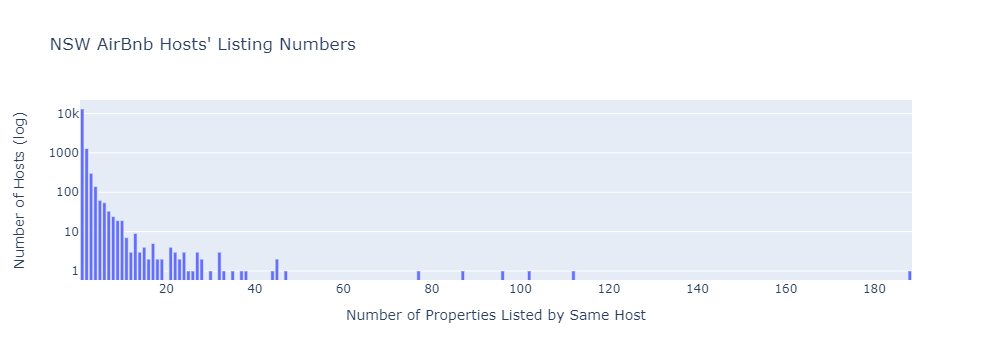

In [114]:


host_property_number = df_listings_detailed.groupby('host_id')['id'].nunique().value_counts()
host_property_number = host_property_number.reset_index()

host_property_number.columns = ["host_listing_number", "host_number"]
#host_property_number
print('The least number of properties listed by one host:', host_property_number.min()[0])
print('The largets number of proeprties list by one host:', host_property_number.max()[0])
print('In average, one host lists properties:', host_property_number.mean()[0])
print('Median number of properties listed by one host:', host_property_number.median()[0])

fig = px.bar(host_property_number,
             x='host_listing_number',
             y='host_number',
             labels={'host_listing_number': 'Number of Properties Listed by Same Host',
                     'host_number': 'Number of Hosts (log)' 
                    },
             log_y=True,
             title="NSW AirBnb Hosts' Listing Numbers "
            )
fig.show()

### Diversities of accommodation types. ##

In the dateset, 83 types of accommodations are listed.
The largest number of accommodations are common types such as unit, room in unit, residential home.
However, there are small numbers of unusual accommodation types e.g. earth house, tent.


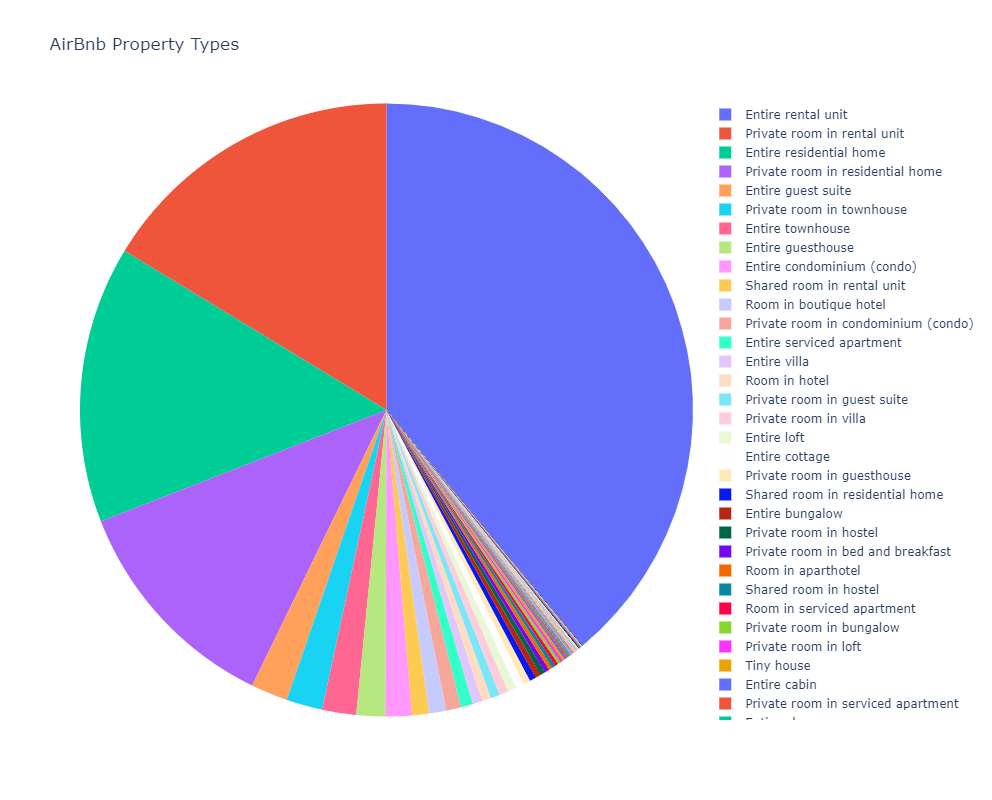

Room types are rather limited. There are 4 types of rooms listed.
Majority of listings are made up of entire home/apt and private room.


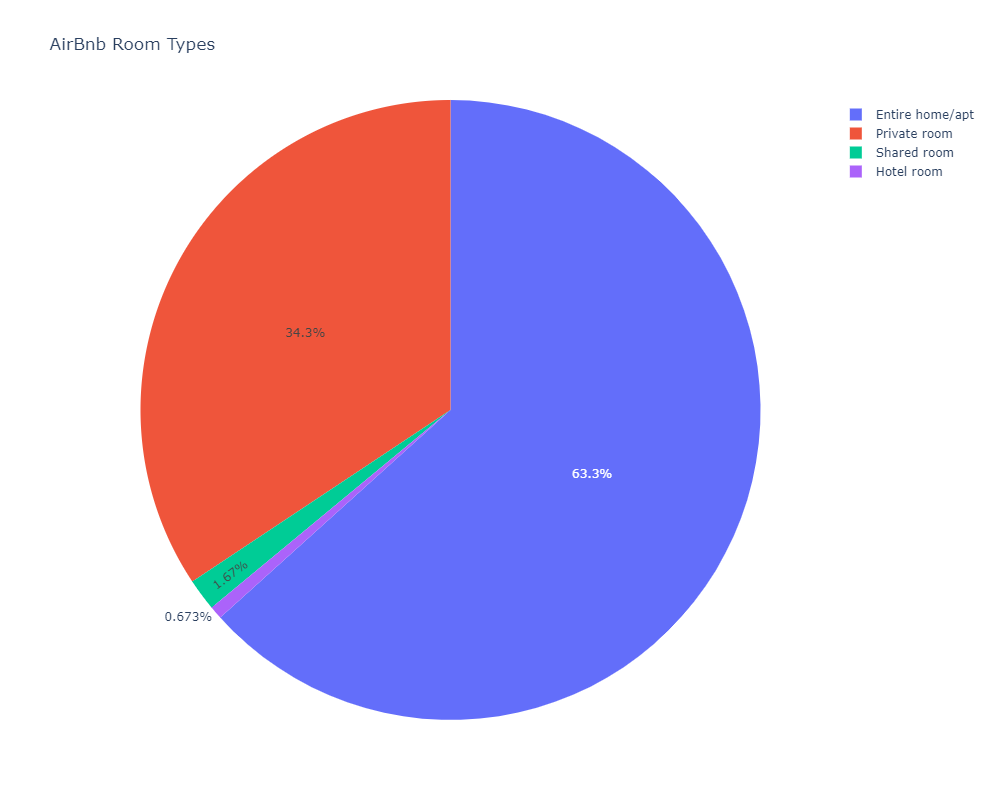

<ipython-input-89-ca70f7a61bb2>:42: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [89]:
df_property_types = df_listings_detailed['property_type'].value_counts()
df_property_types = df_property_types.reset_index()
df_property_types.columns = ['property_type', 'number']

print("In the dateset, {} types of accommodations are listed.".format(df_property_types.shape[0]))
print("The largest number of accommodations are common types such as unit, room in unit, residential home.")
print("However, there are small numbers of unusual accommodation types e.g. earth house, tent.")
df_property_types
fig = px.pie(df_property_types,
             names='property_type',
             values='number',
             
             title="AirBnb Property Types"
            )
fig.update_traces(hoverinfo='label+percent+name', textinfo='none')
fig.update_layout(width=800,
                  height=800
                 )
fig.show()


df_room_types = df_listings_detailed['room_type'].value_counts()
df_room_types = df_room_types.reset_index()
df_room_types.columns = ['room_type', 'number']

print("Room types are rather limited. There are {} types of rooms listed.".format(df_room_types.shape[0]))
print("Majority of listings are made up of entire home/apt and private room.")

df_room_types
fig = px.pie(df_room_types,
             names='room_type',
             values='number',
             title="AirBnb Room Types"
            )
fig.update_traces(hoverinfo='label+percent+name')
fig.update_layout(width=800,
                  height=800
                 )
fig.show()


df_listings_detailed['price_in_number'] = df_listings_detailed['price'].str.replace('$', '')
df_listings_detailed['price_in_number'] = df_listings_detailed['price_in_number'].str.replace(',','')
df_listings_detailed['price_in_number'] = df_listings_detailed['price_in_number'].astype(float).astype(int)
fig = px.violin(df_listings_detailed, 
                y="price_in_number", 
                x="room_type", 
                color="room_type", 
                labels={'room_type': 'Room Type',
                        'price_in_number': 'Price'},
                box=False, 
                points='outliers',#points="all",
                hover_data=['price'],
                #width=2000,
                #height=2000,
                #log_y=True,
                title='Price of different types of rooms'
               )
fig.show()

### Locations: number of properties and their prices in neighbourhoods. ###

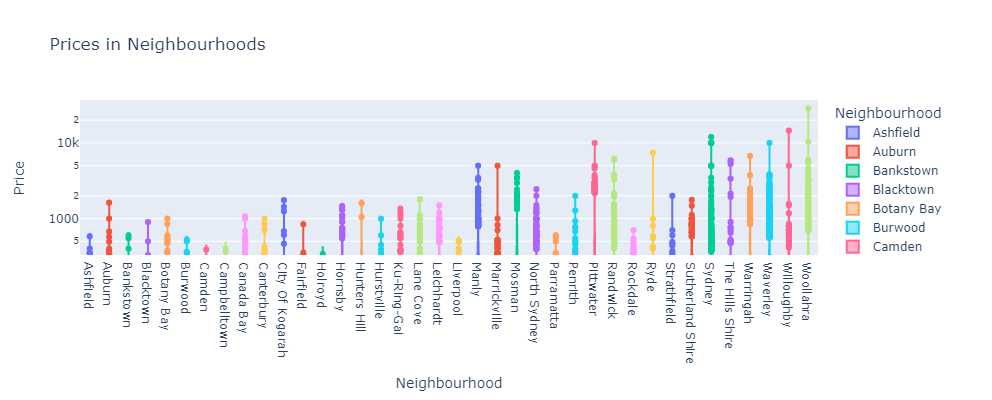

In [131]:
df_listings_number_neighbourhood = df_listings_detailed.groupby('neighbourhood_cleansed')['id'].nunique()
df_listings_number_neighbourhood = df_listings_number_neighbourhood.reset_index()
df_listings_number_neighbourhood.columns = ['neighbourhood', 'property_number']
#df_listings_number_neighbourhood


fig = px.bar(df_listings_number_neighbourhood,
             x='neighbourhood', 
             y='property_number',
             hover_data=['neighbourhood', 'property_number'],
             labels={'neighbourhood': 'Neighbourhood', 'property_number': 'Number of Properties'},
             title='Number of properties in neighbourhoods',
             color='neighbourhood',
             log_y=True,
             height=400
            )
fig.show()


fig = px.violin(df_listings_detailed.sort_values(by=['neighbourhood_cleansed']), 
                y="price_in_number", 
                x="neighbourhood_cleansed", 
                color="neighbourhood_cleansed", 
                labels={'neighbourhood_cleansed': 'Neighbourhood',
                        'price_in_number': 'Price'},
                box=False, 
                points='outliers',#points="all",
                hover_data=['price'],
                #width=2000,
                height=400,
                log_y=True,
                title='Prices in Neighbourhoods'
               )
fig.show()




### How long have the hosts been in the business? ###

Earlist host 2009-03-20 00:00:00
Latest host 2021-11-04 00:00:00


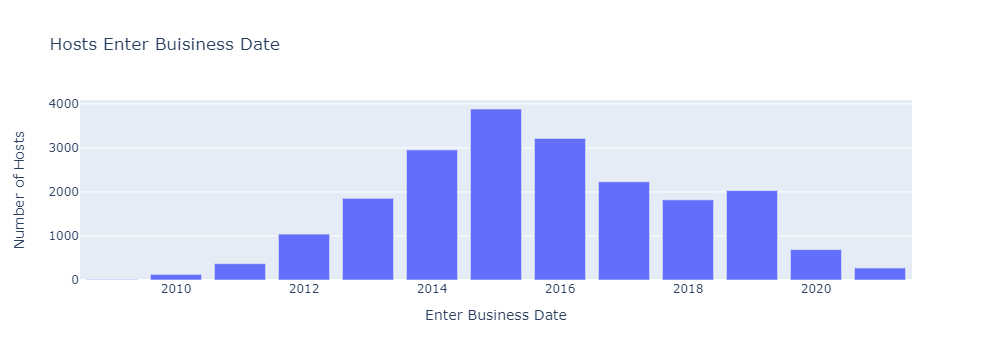

In [111]:

print('Earlist host:', df_listings_detailed['host_since'].min())
print('Latest host:', df_listings_detailed['host_since'].max())
df_listings_detailed['host_since_date'] = df_listings_detailed['host_since'].dt.year
df_enter_business_date = df_listings_detailed['host_since_date'].value_counts().reset_index()
df_enter_business_date.columns = ['enter_business_date', 'number']
df_enter_business_date = df_enter_business_date.sort_values(by=['enter_business_date'])
df_enter_business_date
fig = px.bar(df_enter_business_date,
             x='enter_business_date',
             y='number',
             labels={'enter_business_date': 'Enter Business Date',
                     'number': 'Number of Hosts' 
                    },
             #log_y=True,
             title="Hosts Enter Buisiness Date"
            )
fig.show()